In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [3]:
data1=pd.read_csv('Property_Price_Train.csv')
data2=pd.read_csv('Property_Price_Test.csv')

In [4]:
# Utility_Type,
# LowQualFinSF,
# Underground_Half_Bathroom,
# Kitchen_Above_Grade,
# Three_Season_Lobby_Area,
# Screen_Lobby_Area,
# Pool_Area,
# Miscellaneous_Value
# Sale_Condition,
# Sale_Type,
# Miscellaneous_Feature,
# Fence_Quality,
# Pool_Quality,
# Pavedd_Drive,
# Garage_Condition,
# Garage_Quality,
# Functional_Rate

In [5]:
data1.Condition2.value_counts()

Norm      1444
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [6]:
data1.head(1)

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [7]:
data2.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
0,1461,20,RHD,80.0,16104.819760,Paved,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RLD,81.0,15639.150810,Paved,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RLD,74.0,3849.428920,Paved,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RLD,78.0,4955.447942,Paved,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RLD,43.0,3046.604942,Paved,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
data1.shape

(1459, 81)

In [9]:
#Skewness Present
#Brick_Veneer_Area,
#Garage_Quality,
#Functional_Rate,
#Kitchen_Quality,
#Air_Conditioning,
#Electrical_System,
#Heating_Type,
#BsmtFinSF1,
#BsmtFinSF2,
#Basement_Condition
#Exterior_Condition,
#Exterior_Material,
#Roof_Quality,
#Roof_Design,
#House_Type,
#Condition1,
#Condition2,
#Property_Slope,
#Lot_Configuration
#Land_Outline,
#Lane_Type,
#Road_Type,
#Zoning_Class,
#Lot_Size,
#Total_Basement_Area
#First_Floor_Area,
#Grade_Living_Area,
#Sale_Price,

##Max Skewness
#Utility_Type,
#LowQualFinSF,
#Underground_Half_Bathroom,
#Kitchen_Above_Grade,
#Three_Season_Lobby_Area,
#Screen_Lobby_Area,
#Pool_Area,
#Miscellaneous_Value
#Sale_Condition,
#Sale_Type,
#Miscellaneous_Feature,
#Fence_Quality,
#Pool_Quality,
#Pavedd_Drive,
#Garage_Condition,
#Garage_Quality,
#Functional_Rate

In [10]:
#data1.Month_Sold.skew()

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
data1.Lot_Extent=le.fit_transform(data1.Lot_Extent)
data1.Brick_Veneer_Area=le.fit_transform(data1.Brick_Veneer_Area)
data1.Garage_Built_Year=le.fit_transform(data1.Garage_Built_Year)
data1.Sale_Condition=le.fit_transform(data1.Sale_Condition)
data1.Sale_Type=le.fit_transform(data1.Sale_Type)
data1.Miscellaneous_Feature=le.fit_transform(data1.Miscellaneous_Feature)
data1.Fence_Quality=le.fit_transform(data1.Fence_Quality)
data1.Pool_Quality=le.fit_transform(data1.Pool_Quality)
data1.Pavedd_Drive=le.fit_transform(data1.Pavedd_Drive)
data1.Garage_Condition=le.fit_transform(data1.Garage_Condition)
data1.Garage_Quality=le.fit_transform(data1.Garage_Quality)
data1.Garage_Finish_Year=le.fit_transform(data1.Garage_Finish_Year)
data1.Garage=le.fit_transform(data1.Garage)
data1.Fireplace_Quality=le.fit_transform(data1.Fireplace_Quality)
data1.Functional_Rate=le.fit_transform(data1.Functional_Rate)
data1.Kitchen_Quality=le.fit_transform(data1.Kitchen_Quality)
data1.Electrical_System=le.fit_transform(data1.Electrical_System)
data1.Air_Conditioning=le.fit_transform(data1.Air_Conditioning)
data1.Heating_Quality=le.fit_transform(data1.Heating_Quality)
data1.Heating_Type=le.fit_transform(data1.Heating_Type)
data1.BsmtFinType2=le.fit_transform(data1.BsmtFinType2)
data1.BsmtFinType1=le.fit_transform(data1.BsmtFinType1)
data1.Exposure_Level=le.fit_transform(data1.Exposure_Level)
data1.Basement_Condition=le.fit_transform(data1.Basement_Condition)
data1.Basement_Height=le.fit_transform(data1.Basement_Height)
data1.Foundation_Type=le.fit_transform(data1.Foundation_Type)
data1.Exterior_Condition=le.fit_transform(data1.Exterior_Condition)
data1.Exterior_Material=le.fit_transform(data1.Exterior_Material)
data1.Brick_Veneer_Type=le.fit_transform(data1.Brick_Veneer_Type)
data1.Exterior2nd=le.fit_transform(data1.Exterior2nd)
data1.Exterior1st=le.fit_transform(data1.Exterior1st)
data1.Roof_Quality=le.fit_transform(data1.Roof_Quality)
data1.Roof_Design=le.fit_transform(data1.Roof_Design)
data1.House_Design=le.fit_transform(data1.House_Design)
data1.House_Type=le.fit_transform(data1.House_Type)
data1.Condition2=le.fit_transform(data1.Condition2)
data1.Condition1=le.fit_transform(data1.Condition1)
data1.Neighborhood=le.fit_transform(data1.Neighborhood)
data1.Property_Slope=le.fit_transform(data1.Property_Slope)
data1.Lot_Configuration=le.fit_transform(data1.Lot_Configuration)
data1.Utility_Type=le.fit_transform(data1.Utility_Type)
data1.Land_Outline=le.fit_transform(data1.Land_Outline)
data1.Property_Shape=le.fit_transform(data1.Property_Shape)
data1.Lane_Type=le.fit_transform(data1.Lane_Type)
data1.Road_Type=le.fit_transform(data1.Road_Type)
data1.Zoning_Class=le.fit_transform(data1.Zoning_Class)

In [13]:
#Cleaning for the testing a Data
data2.Lot_Extent=le.fit_transform(data2.Lot_Extent)
data2.Brick_Veneer_Area=le.fit_transform(data2.Brick_Veneer_Area)
data2.Garage_Built_Year=le.fit_transform(data2.Garage_Built_Year)
data2.Sale_Condition=le.fit_transform(data2.Sale_Condition)
data2.Sale_Type=le.fit_transform(data2.Sale_Type)
data2.Miscellaneous_Feature=le.fit_transform(data2.Miscellaneous_Feature)
data2.Fence_Quality=le.fit_transform(data2.Fence_Quality)
data2.Pool_Quality=le.fit_transform(data2.Pool_Quality)
data2.Pavedd_Drive=le.fit_transform(data2.Pavedd_Drive)
data2.Garage_Condition=le.fit_transform(data2.Garage_Condition)
data2.Garage_Quality=le.fit_transform(data2.Garage_Quality)
data2.Garage_Finish_Year=le.fit_transform(data2.Garage_Finish_Year)
data2.Garage=le.fit_transform(data2.Garage)
data2.Fireplace_Quality=le.fit_transform(data2.Fireplace_Quality)
data2.Functional_Rate=le.fit_transform(data2.Functional_Rate)
data2.Kitchen_Quality=le.fit_transform(data2.Kitchen_Quality)
data2.Electrical_System=le.fit_transform(data2.Electrical_System)
data2.Air_Conditioning=le.fit_transform(data2.Air_Conditioning)
data2.Heating_Quality=le.fit_transform(data2.Heating_Quality)
data2.Heating_Type=le.fit_transform(data2.Heating_Type)
data2.BsmtFinType2=le.fit_transform(data2.BsmtFinType2)
data2.BsmtFinType1=le.fit_transform(data2.BsmtFinType1)
data2.Exposure_Level=le.fit_transform(data2.Exposure_Level)
data2.Basement_Condition=le.fit_transform(data2.Basement_Condition)
data2.Basement_Height=le.fit_transform(data2.Basement_Height)
data2.Foundation_Type=le.fit_transform(data2.Foundation_Type)
data2.Exterior_Condition=le.fit_transform(data2.Exterior_Condition)
data2.Exterior_Material=le.fit_transform(data2.Exterior_Material)
data2.Brick_Veneer_Type=le.fit_transform(data2.Brick_Veneer_Type)
data2.Exterior2nd=le.fit_transform(data2.Exterior2nd)
data2.Exterior1st=le.fit_transform(data2.Exterior1st)
data2.Roof_Quality=le.fit_transform(data2.Roof_Quality)
data2.Roof_Design=le.fit_transform(data2.Roof_Design)
data2.House_Design=le.fit_transform(data2.House_Design)
data2.House_Type=le.fit_transform(data2.House_Type)
data2.Condition2=le.fit_transform(data2.Condition2)
data2.Condition1=le.fit_transform(data2.Condition1)
data2.Neighborhood=le.fit_transform(data2.Neighborhood)
data2.Property_Slope=le.fit_transform(data2.Property_Slope)
data2.Lot_Configuration=le.fit_transform(data2.Lot_Configuration)
data2.Utility_Type=le.fit_transform(data2.Utility_Type)
data2.Land_Outline=le.fit_transform(data2.Land_Outline)
data2.Property_Shape=le.fit_transform(data2.Property_Shape)
data2.Lane_Type=le.fit_transform(data2.Lane_Type)
data2.Road_Type=le.fit_transform(data2.Road_Type)
data2.Zoning_Class=le.fit_transform(data2.Zoning_Class)
data2.Lot_Size=le.fit_transform(data2.Lot_Size)

In [14]:
GFG = pd.ExcelWriter('Property_Price_Train.xlsx')
data1.to_excel(GFG, index=False)
 
GFG.save()

In [15]:
data2.isnull().sum()

Id                     0
Building_Class         0
Zoning_Class           0
Lot_Extent             0
Lot_Size               0
                      ..
Miscellaneous_Value    0
Month_Sold             0
Year_Sold              0
Sale_Type              0
Sale_Condition         0
Length: 80, dtype: int64

In [16]:
y=data1.iloc[:,-1]

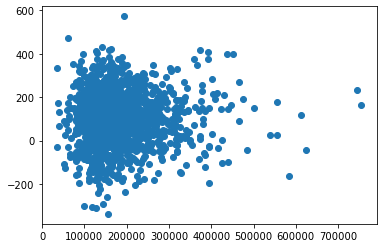

In [17]:
plt.scatter(data1.Sale_Price,data1.W_Deck_Area)

In [18]:
#Null Values not present
#Zoning_class,Road_type,Lane_type,Property_shape,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2
#Heating_Type,House_Design,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Exterior_Material,Exterior_Condition
#Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinType2,Heating_Type,Heating_Quality,
#Air_Conditioning,Electrical_System,Kitchen_Quality,Functional_Rate,Fireplace_Quality,Garage,Garage_Finish_Year,Garage_Quality,
#Garage_Condition,Pavedd_Drive,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Sale_Type,Sale_Condition


In [19]:
#data2=data2[data2.Miscellaneous_Value>0]
#data2.Miscellaneous_Value=np.log(data2.Miscellaneous_Value)#Skewness is treated

In [20]:
#data1=data1[data1.Miscellaneous_Value>0]
#data1.Miscellaneous_Value=np.log(data1.Miscellaneous_Value)

In [21]:
#data1.LowQualFinSF.skew()

In [22]:
data1.shape

(1459, 81)

In [23]:
data1.columns

Index(['Id', 'Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size',
       'Road_Type', 'Lane_Type', 'Property_Shape', 'Land_Outline',
       'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood',
       'Condition1', 'Condition2', 'House_Type', 'House_Design',
       'Overall_Material', 'House_Condition', 'Construction_Year',
       'Remodel_Year', 'Roof_Design', 'Roof_Quality', 'Exterior1st',
       'Exterior2nd', 'Brick_Veneer_Type', 'Brick_Veneer_Area',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'Heating_Type', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'First_Floor_Area',
       'Second_Floor_Area', 'LowQualFinSF', 'Grade_Living_Area',
       'Underground_Full_Bathroom', 'Underground_Half_Bathroom',
       'Full_Bathroom_Above_Grade', 'Ha

<AxesSubplot:ylabel='Density'>

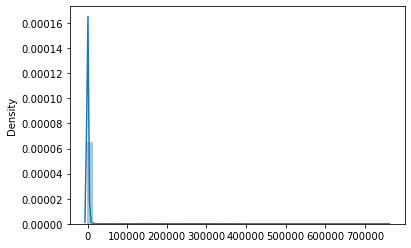

In [24]:
sns.distplot(data1)

In [25]:
data1.dtypes

Id                int64
Building_Class    int64
Zoning_Class      int32
Lot_Extent        int64
Lot_Size          int64
                  ...  
Month_Sold        int64
Year_Sold         int64
Sale_Type         int32
Sale_Condition    int32
Sale_Price        int64
Length: 81, dtype: object

<AxesSubplot:xlabel='Foundation_Type', ylabel='count'>

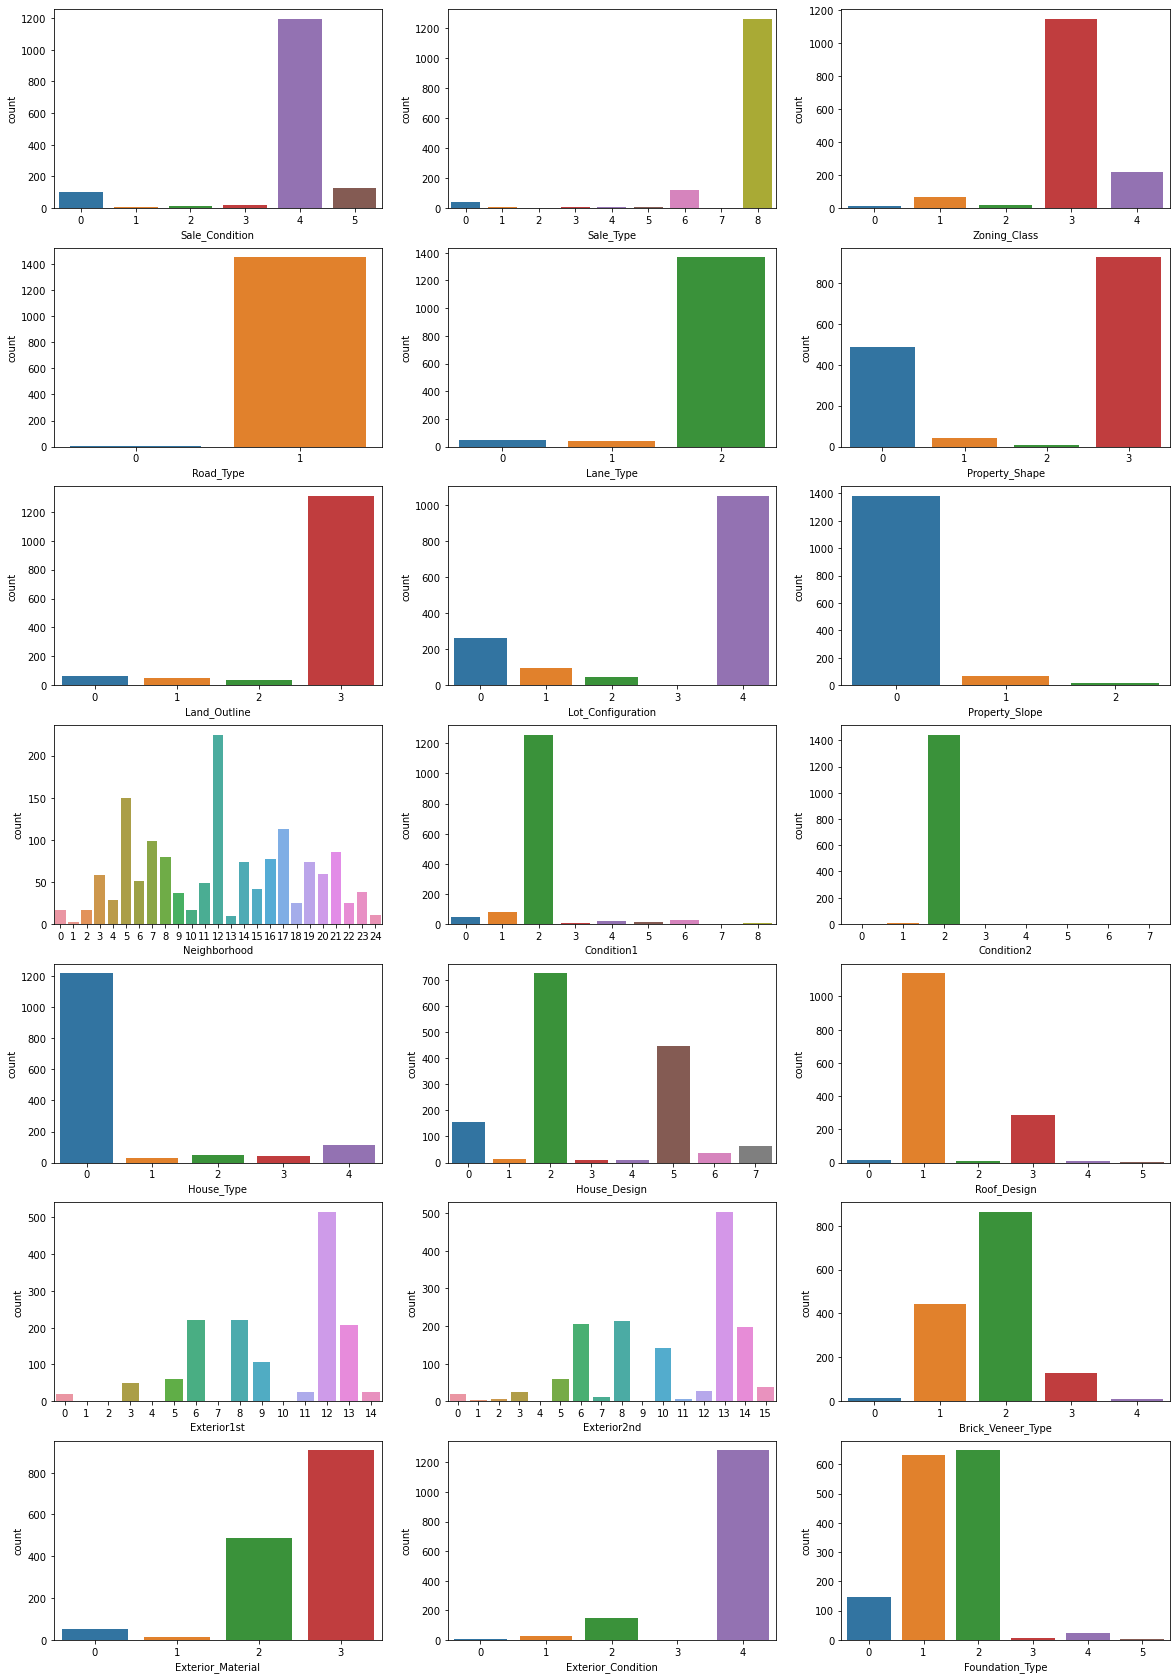

In [26]:
fig,ax = plt.subplots(7,3,figsize = (20,30))
sns.countplot("Sale_Condition",data=data1,ax=ax[0][0])
sns.countplot("Sale_Type",data=data1,ax=ax[0][1])
sns.countplot("Zoning_Class",data=data1,ax=ax[0][2])
sns.countplot("Road_Type",data=data1,ax=ax[1][0])
sns.countplot("Lane_Type",data=data1,ax=ax[1][1])
sns.countplot("Property_Shape",data=data1,ax=ax[1][2])
sns.countplot(data1.Land_Outline,ax=ax[2][0])
sns.countplot(data1.Lot_Configuration,ax=ax[2][1])
sns.countplot(data1.Property_Slope,ax=ax[2][2])
sns.countplot(data1.Neighborhood,ax=ax[3][0])
sns.countplot(data1.Condition1,ax=ax[3][1])
sns.countplot(data1.Condition2,ax=ax[3][2])
sns.countplot(data1.House_Type,ax=ax[4][0])
sns.countplot(data1.House_Design,ax=ax[4][1])
sns.countplot(data1.Roof_Design,ax=ax[4][2])
sns.countplot(data1.Exterior1st,ax=ax[5][0])
sns.countplot(data1.Exterior2nd,ax=ax[5][1])
sns.countplot(data1.Brick_Veneer_Type,ax=ax[5][2])
sns.countplot(data1.Exterior_Material,ax=ax[6][0])
sns.countplot(data1.Exterior_Condition,ax=ax[6][1])
sns.countplot(data1.Foundation_Type,ax=ax[6][2])




<AxesSubplot:xlabel='Garage_Built_Year', ylabel='count'>

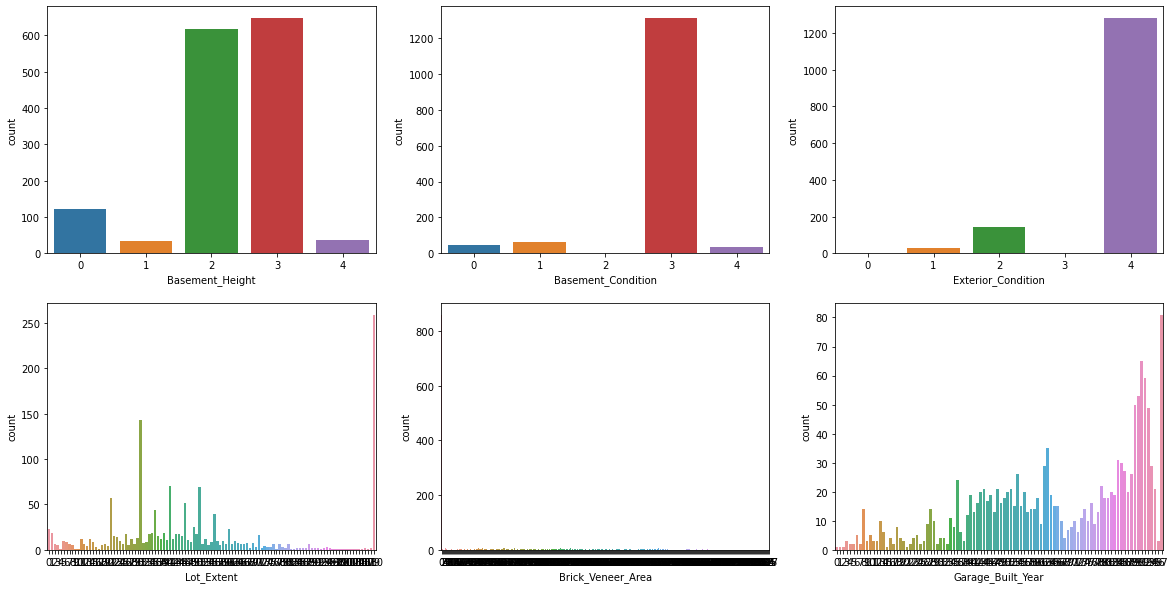

In [27]:
fig,ax = plt.subplots(2,3,figsize = (20,10))
sns.countplot(data1.Basement_Height,ax=ax[0][0])
sns.countplot(data1.Basement_Condition,ax=ax[0][1])
sns.countplot(data1.Exterior_Condition,ax=ax[0][2])
sns.countplot(data1.Lot_Extent,ax=ax[1][0])
sns.countplot(data1.Brick_Veneer_Area,ax=ax[1][1])
sns.countplot(data1.Garage_Built_Year,ax=ax[1][2])



In [28]:
data1.corr()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
Id,1.000000,0.012207,-0.006048,0.000738,-0.033191,0.008849,-0.001822,0.031270,-0.020053,0.013369,...,0.057184,-0.034038,-0.000942,0.036868,-0.006145,0.021336,0.000548,0.019422,-0.006059,-0.021441
Building_Class,0.012207,1.000000,0.035882,-0.233365,-0.139852,-0.024937,-0.105878,0.119793,-0.002752,-0.022865,...,0.008244,-0.005184,0.086662,0.034984,-0.007738,-0.013660,-0.021330,0.012656,-0.024822,-0.084563
Zoning_Class,-0.006048,0.035882,1.000000,-0.084300,-0.034453,0.087656,-0.052033,0.061923,-0.017845,-0.001193,...,-0.003130,0.002884,-0.061279,0.000679,0.009290,-0.031500,-0.020623,0.097450,0.009500,-0.166896
Lot_Extent,0.000738,-0.233365,-0.084300,1.000000,0.261663,-0.023532,0.151485,-0.356086,0.000440,0.046062,...,0.062353,-0.062116,-0.040666,-0.055588,0.065088,-0.005936,0.021644,0.005389,0.017897,0.213776
Lot_Size,-0.033191,-0.139852,-0.034453,0.261663,1.000000,-0.197129,0.060116,-0.165317,-0.149076,0.010122,...,0.077670,-0.065165,0.036052,-0.103537,0.038064,0.001200,-0.014256,0.012305,0.034178,0.263843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Month_Sold,0.021336,-0.013660,-0.031500,-0.005936,0.001200,0.003695,0.013114,-0.033400,-0.011573,-0.051554,...,-0.033742,0.036374,-0.009855,-0.014177,-0.006502,1.000000,-0.145712,-0.047362,0.013338,0.046401
Year_Sold,0.000548,-0.021330,-0.020623,0.021644,-0.014256,-0.025050,0.020921,0.036384,0.020478,0.023355,...,-0.059683,0.060899,-0.035412,-0.055981,0.004915,-0.145712,1.000000,-0.002357,0.003861,-0.028884
Sale_Type,0.019422,0.012656,0.097450,0.005389,0.012305,0.014326,0.008153,-0.001073,-0.025823,-0.126768,...,0.011024,-0.013606,-0.006253,-0.003352,0.015793,-0.047362,-0.002357,1.000000,0.184031,-0.054826
Sale_Condition,-0.006059,-0.024822,0.009500,0.017897,0.034178,0.006055,0.035684,-0.038234,0.033766,-0.089698,...,-0.067243,0.097418,0.100619,0.003165,0.013040,0.013338,0.003861,0.184031,1.000000,0.213168


In [29]:
# Create correlation matrix
corr_matrix = data1.corr().abs()

In [30]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [31]:

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

In [32]:
to_drop

['House_Type',
 'Exterior2nd',
 'BsmtFinSF2',
 'First_Floor_Area',
 'Rooms_Above_Grade',
 'Fireplace_Quality',
 'Pool_Quality',
 'Sale_Price']

In [33]:
data1.drop(to_drop, axis=1, inplace=True)

In [34]:
data1.shape

(1459, 73)

In [35]:
#def correlation(dataset, threshold):
#    col_corr = set() # Set of all the names of deleted columns
#    corr_matrix = dataset.corr()
#    for i in range(len(corr_matrix.columns)):
#        for j in range(i):
#            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
#                colname = corr_matrix.columns[i] # getting the name of column
#                col_corr.add(colname)
#                if colname in dataset.columns:
#                    del dataset[colname] # deleting the column from the dataset
#

In [36]:
#correlation(data1,0.9)

In [37]:
data1.shape

(1459, 73)

Id                     int64
Building_Class         int64
Zoning_Class           int32
Lot_Extent             int64
Lot_Size               int64
                       ...  
Miscellaneous_Value    int64
Month_Sold             int64
Year_Sold              int64
Sale_Type              int32
Sale_Condition         int32
Length: 80, dtype: object

In [39]:
data1.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
0,1,60,3,36,8450,1,2,3,3,0,...,0,0,0,4,4,0,2,2008,8,4
1,2,20,3,51,9600,1,2,3,3,0,...,0,0,0,4,4,0,5,2007,8,4
2,3,60,3,39,11250,1,2,0,3,0,...,0,0,0,4,4,0,9,2008,8,4
3,4,70,3,31,9550,1,2,0,3,0,...,0,0,0,4,4,0,2,2006,8,0
4,5,60,3,55,14260,1,2,0,3,0,...,0,0,0,4,4,0,12,2008,8,4


In [40]:
#correlation(data2,0.4)

In [41]:
#data2.shape

In [54]:
x=data1.iloc[:,1:77]

In [56]:
from sklearn import linear_model
lm=linear_model.LinearRegression()

In [57]:
lm.fit(x,y)

LinearRegression()

In [68]:
lp1 = lm.predict(x_test)
abs(lp1)

array([215899.84723808, 200065.56877773, 225332.88340051, ...,
       221728.26167118, 251843.56721108, 146779.44180606])

In [69]:
err_lm = y - lp1
err_lm

0       -7399.847238
1      -18565.568778
2       -1832.883401
3      -34359.528629
4      -39194.519109
            ...     
1454    -9844.877749
1455     1735.004774
1456   -11728.261671
1457    14656.432789
1458    -4654.441806
Name: Sale_Price, Length: 1459, dtype: float64

In [70]:
MAPE = np.mean(np.abs(err_lm)*100/y)
MAPE

11.047012263129783

In [71]:
Acc=(100-MAPE)
Acc

88.95298773687021

In [60]:
from sklearn.linear_model import Lasso

In [61]:
l=Lasso()

In [65]:
l.fit(x,y)

Lasso()

In [66]:
pred_on=l.predict(x)
pred_on

array([215899.71233627, 200054.90246943, 225339.29360142, ...,
       221731.3243866 , 251832.10720712, 146733.0648386 ])

In [76]:
l.coef_

array([-1.64681341e+02, -7.04950856e+02, -1.80791984e+01,  3.90177110e-01,
        2.94892517e+04,  4.94674935e+03, -1.20985474e+03,  3.45067015e+03,
       -4.47682494e+04,  5.95091999e+01,  6.10062254e+03,  4.18234866e+02,
       -9.86347693e+02, -9.11708352e+03, -1.03460509e+03,  1.11809060e+04,
        5.10695072e+03,  1.59532800e+02,  5.17173640e+01,  2.29237944e+03,
        2.66689278e+04, -7.12796510e+02,  3.03664382e+03,  4.16268940e+01,
       -9.07178887e+03,  7.15108092e+02,  2.46476297e+03, -8.79011220e+03,
        2.84551581e+03, -3.96158220e+03, -5.83706495e+02, -2.51446038e+00,
        8.59575312e+02, -1.35781389e+01,  1.64887795e+01, -2.38590003e+03,
       -1.29434580e+03, -1.77165467e+03, -8.29020435e+02,  3.81161279e+00,
       -3.96031338e+01,  5.03261939e+01,  5.47149784e+03, -5.36004772e+02,
        3.54537804e+03, -8.63506067e+02, -1.21455012e+03, -7.89735551e+03,
       -8.50611805e+03,  2.07578145e+03,  6.10895911e+03,  1.23305491e+03,
       -9.67962197e+00,  

In [77]:
l.intercept_

1438464.1994815602

In [78]:


import pandas as pd
from IPython.display import display

pd.options.display.max_columns = None

In [79]:

data_f=pd.DataFrame({"importance":list(l.coef_),"Columns":list(x)})
pd.set_option('display.max_columns', None)
data_f

,importance,Columns
0,-164.681341,Building_Class
1,-704.950856,Zoning_Class
2,-18.079198,Lot_Extent
3,0.390177,Lot_Size
4,29489.251720,Road_Type
...,...,...
67,0.669046,Miscellaneous_Value
68,-303.503720,Month_Sold
69,-989.945282,Year_Sold
70,-761.920328,Sale_Type


In [88]:
data_f.to_excel('FeaturesIMP.xlsx')

In [81]:
errLaso = y - pred_on
errLaso

0       -7399.712336
1      -18554.902469
2       -1839.293601
3      -34337.668622
4      -39188.486761
            ...     
1454    -9858.132017
1455     1721.862905
1456   -11731.324387
1457    14667.892793
1458    -4608.064839
Name: Sale_Price, Length: 1459, dtype: float64

In [82]:
R2=l.score(x,y)
R2

0.8518615326196568

In [83]:
Ajrsq= 1- (((1-R2)*(1459-1))/(1459-62-1))
Ajrsq

0.8452823170196702

In [84]:
MAPELasso = np.mean(np.abs(errLaso)*100/y)
MAPELasso

11.0458848074672

In [85]:
Acc=(100-MAPELasso)
Acc

88.9541151925328